<a href="https://colab.research.google.com/github/FATHINFF/Final_Project/blob/main/Final_Project_Greatest_Zee_Menganalisa_Tingkat_Polusi_Udara_di_DKI_Jakarta_Jashinta_Kresna_Senja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SUMBER**

https://www.kaggle.com/datasets/derryderajat/indeks-pencemaran-udara-dki/data

# **Bussiness Uderstanding**

Polusi udara merupakan isu lingkungan yang krusial, baik di dalam ruangan
maupun di luar ruangan, yang memiliki dampak signifikan pada kesehatan masyarakat dan lingkungan. Sumber polusi udara berasal dari berbagai aktivitas seperti alat pembakaran rumah tangga, kendaraan bermotor, fasilitas industri, dan kebakaran hutan. Polutan utama yang mempengaruhi kesehatan masyarakat meliputi particulate matter (PM), karbon monoksida (CO), ozon (O3), nitrogen dioksida (NO2), dan sulfur dioksida (SO2). Oleh karena itu, pemahaman yang mendalam tentang tingkat dan sumber polusi udara di Daerah Khusus Ibukota Jakarta (DKI) sangat penting untuk mengidentifikasi potensi dampak kesehatan masyarakat dan lingkungan.

# **Tujuan**

Membuat model prediksi untuk memitigasi polusi udara di DKI Jakarta dengan melakukan klasifikasi dan regresi pada dataset.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount ('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Dataset/Indeks Standar Pencemar Udara di Provinsi DKI Jakarta 2021.csv')

In [ ]:
df

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
0,1/1/2021,43,NaN,58,29,35,65,65,O3,SEDANG,DKI2
1,1/2/2021,58,NaN,86,38,64,80,86,PM25,SEDANG,DKI3
2,1/3/2021,64,NaN,93,25,62,86,93,PM25,SEDANG,DKI3
3,1/4/2021,50,NaN,67,24,31,77,77,O3,SEDANG,DKI2
4,1/5/2021,59,NaN,89,24,35,77,89,PM25,SEDANG,DKI3
...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/2021,75,121.0,61,23,40,47,121,PM25,TIDAK SEHAT,DKI4
361,12/28/2021,59,89.0,53,16,34,33,89,PM25,SEDANG,DKI4
362,12/29/2021,61,98.0,54,15,37,29,98,PM25,SEDANG,DKI4
363,12/30/2021,60,102.0,53,17,38,44,102,PM25,TIDAK SEHAT,DKI4


#**Data Understanding**

Dataset yang digunakan adalah Indeks Standar Pencemar Udara di Provinsi DKI Jakarta 2021. Dataset ini memiliki 365 baris dan 11 kolom yang berisi mengenai Indeks Standar Pencemar Udara (ISPU) yang diukur dari 5 stasiun pemantau kualitas udara (SPKU) yang ada di Provinsi DKI Jakarta Tahun 2021. Dinas Lingkungan Hidup DKI Jakarta memiliki 5 Stasiun Pemantau Kualitas Udara (SPKU) yang ditempatkan di 5 wilayah Kota Administrasi, yaitu :
Bundaran HI (Jl. MH Thamrin, sebelah Pos Polisi Bundaran HI, Jakarta Pusat)
Kelapa Gading (RPTRA Kelapa Nias III, Jakarta Utara)
Jagakarsa (Di area kebon bibit Dinas Pertamanan, Jagakarsa, Jakarta Selatan)
Lubang Buaya (Di area parkir Monumen Lubang Buaya, Jakarta Timur)
Kebon Jeruk (Jl. Jeruk Kuning BI Srengseng, Kembangan, Jakarta Barat)

1. Tanggal: 1 Januari 2021 s/d 31 Desember 2021
2. PM10: Partikel udara yang berukuran lebih kecil dari 10 mikron
3. PM2.5: Partikel halus di udara yang ukurannya 2.5 mikron
4. SO2: Sulfur dioksida
5. CO: Karbon monoksida
6. O3: Ozon
7. NO2: Nitrogen dioksida
8. Max: Nilai ukur paling tinggi dari seluruh parameter yang diukur dalam waktu yang sama
9. Critical: Parameter yang hasil pengukurannya paling tinggi
10. Category: Kategori hasil perhitungan indeks standar pencemaran udara
11. Location: Lokasi pengukuran di stasiun


# **Data Preprocessing**

Explaratory Data Analyst

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   365 non-null    object 
 1   pm10      365 non-null    int64  
 2   pm25      334 non-null    float64
 3   so2       365 non-null    int64  
 4   co        365 non-null    int64  
 5   o3        365 non-null    int64  
 6   no2       365 non-null    int64  
 7   max       365 non-null    int64  
 8   critical  365 non-null    object 
 9   categori  365 non-null    object 
 10  location  365 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 31.5+ KB


In [ ]:
df.isna().values.any()

True

In [ ]:
data_null = df.isnull().sum()
data_null

tanggal      0
pm10         0
pm25        31
so2          0
co           0
o3           0
no2          0
max          0
critical     0
categori     0
location     0
dtype: int64

In [ ]:
df_ = df.dropna(subset = 'pm25')

In [ ]:
from scipy.stats import shapiro

shapiro(df_["pm25"])

ShapiroResult(statistic=0.9902529716491699, pvalue=0.02564365603029728)

In [ ]:
df.fillna(df.mean(), inplace=True)
df

<ipython-input-12-a8a6b5c7206a>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
0,1/1/2021,43,94.694611,58,29,35,65,65,O3,SEDANG,DKI2
1,1/2/2021,58,94.694611,86,38,64,80,86,PM25,SEDANG,DKI3
2,1/3/2021,64,94.694611,93,25,62,86,93,PM25,SEDANG,DKI3
3,1/4/2021,50,94.694611,67,24,31,77,77,O3,SEDANG,DKI2
4,1/5/2021,59,94.694611,89,24,35,77,89,PM25,SEDANG,DKI3
...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/2021,75,121.000000,61,23,40,47,121,PM25,TIDAK SEHAT,DKI4
361,12/28/2021,59,89.000000,53,16,34,33,89,PM25,SEDANG,DKI4
362,12/29/2021,61,98.000000,54,15,37,29,98,PM25,SEDANG,DKI4
363,12/30/2021,60,102.000000,53,17,38,44,102,PM25,TIDAK SEHAT,DKI4


In [ ]:
df.at[211, 'critical'] = 'PM25'

In [ ]:
df_cleaned = df.copy()
df_cleaned['pm25'] = df['pm25'].astype(int)
df_cleaned

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
0,1/1/2021,43,94,58,29,35,65,65,O3,SEDANG,DKI2
1,1/2/2021,58,94,86,38,64,80,86,PM25,SEDANG,DKI3
2,1/3/2021,64,94,93,25,62,86,93,PM25,SEDANG,DKI3
3,1/4/2021,50,94,67,24,31,77,77,O3,SEDANG,DKI2
4,1/5/2021,59,94,89,24,35,77,89,PM25,SEDANG,DKI3
...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/2021,75,121,61,23,40,47,121,PM25,TIDAK SEHAT,DKI4
361,12/28/2021,59,89,53,16,34,33,89,PM25,SEDANG,DKI4
362,12/29/2021,61,98,54,15,37,29,98,PM25,SEDANG,DKI4
363,12/30/2021,60,102,53,17,38,44,102,PM25,TIDAK SEHAT,DKI4


In [ ]:
#Menghapus Column yang tidak terpakai
df_drop = df_cleaned.drop(['so2', 'co', 'o3', 'no2', 'critical'], axis=1, inplace=True)

In [ ]:
df_cleaned

,tanggal,pm10,pm25,max,categori,location
0,1/1/2021,43,94,65,SEDANG,DKI2
1,1/2/2021,58,94,86,SEDANG,DKI3
2,1/3/2021,64,94,93,SEDANG,DKI3
3,1/4/2021,50,94,77,SEDANG,DKI2
4,1/5/2021,59,94,89,SEDANG,DKI3
...,...,...,...,...,...,...
360,12/27/2021,75,121,121,TIDAK SEHAT,DKI4
361,12/28/2021,59,89,89,SEDANG,DKI4
362,12/29/2021,61,98,98,SEDANG,DKI4
363,12/30/2021,60,102,102,TIDAK SEHAT,DKI4


In [ ]:
#pake pm 25
def category(pm25):
    if pm25 < 15 :
      kategori = 'SEHAT'
    elif pm25 >16 and pm25 <= 55:
      kategori = 'SEDANG'
    elif pm25 >= 56 and pm25 <= 150:
      kategori = 'TIDAK SEHAT'
    else:
      kategori = 'SANGAT TIDAK SEHAT'
    return kategori

In [ ]:
kategori25 = []

for index, row in df_cleaned.iterrows():
    kategori = category(row['pm25'])
    kategori25.append(kategori)

df_cleaned['categori'] = kategori25
print(df_cleaned)

        tanggal  pm10  pm25  max     categori location
0      1/1/2021    43    94   65  TIDAK SEHAT     DKI2
1      1/2/2021    58    94   86  TIDAK SEHAT     DKI3
2      1/3/2021    64    94   93  TIDAK SEHAT     DKI3
3      1/4/2021    50    94   77  TIDAK SEHAT     DKI2
4      1/5/2021    59    94   89  TIDAK SEHAT     DKI3
..          ...   ...   ...  ...          ...      ...
360  12/27/2021    75   121  121  TIDAK SEHAT     DKI4
361  12/28/2021    59    89   89  TIDAK SEHAT     DKI4
362  12/29/2021    61    98   98  TIDAK SEHAT     DKI4
363  12/30/2021    60   102  102  TIDAK SEHAT     DKI4
364  12/31/2021    64    90   90  TIDAK SEHAT     DKI4

[365 rows x 6 columns]


In [ ]:
df_cleaned[df_cleaned['pm25'].between(56, 150)].agg({'pm25': ['min', 'max']})

,pm25
min,56
max,150


In [ ]:
#ngerubah tipedata tanggal from object to date time
df_cleaned['tanggal'] = pd.to_datetime(df_cleaned['tanggal'])

In [ ]:
df_cleaned[(df_cleaned['categori'] == 'TIDAK SEHAT') & (df_cleaned['location'] == 'DKI5')].shape[0]

29

In [ ]:
#Date Range Bulan Januari
start_date = '2021/1/1'
end_date = '2021/1/31'
januari = df_cleaned[(df_cleaned['tanggal'] >= start_date) & (df_cleaned['tanggal'] <= end_date)]

In [ ]:
januari

,tanggal,pm10,pm25,max,categori,location
0,2021-01-01,43,94,65,TIDAK SEHAT,DKI2
1,2021-01-02,58,94,86,TIDAK SEHAT,DKI3
2,2021-01-03,64,94,93,TIDAK SEHAT,DKI3
3,2021-01-04,50,94,77,TIDAK SEHAT,DKI2
4,2021-01-05,59,94,89,TIDAK SEHAT,DKI3
5,2021-01-06,73,94,85,TIDAK SEHAT,DKI2
6,2021-01-07,36,94,72,TIDAK SEHAT,DKI2
7,2021-01-08,38,94,71,TIDAK SEHAT,DKI2
8,2021-01-09,60,94,80,TIDAK SEHAT,DKI2
9,2021-01-10,24,94,59,TIDAK SEHAT,DKI2


In [ ]:
#Date Range Juli
start_date = '2021/7/1'
end_date = '2021/7/31'
juli = df_cleaned[(df_cleaned['tanggal'] >= start_date) & (df_cleaned['tanggal'] <= end_date)]
juli

,tanggal,pm10,pm25,max,categori,location
181,2021-07-01,64,114,114,TIDAK SEHAT,DKI4
182,2021-07-02,68,108,108,TIDAK SEHAT,DKI4
183,2021-07-03,80,141,141,TIDAK SEHAT,DKI4
184,2021-07-04,94,161,161,SANGAT TIDAK SEHAT,DKI4
185,2021-07-05,83,153,153,SANGAT TIDAK SEHAT,DKI4
186,2021-07-06,68,102,102,TIDAK SEHAT,DKI3
187,2021-07-07,84,130,130,TIDAK SEHAT,DKI4
188,2021-07-08,83,145,145,TIDAK SEHAT,DKI4
189,2021-07-09,92,156,156,SANGAT TIDAK SEHAT,DKI4
190,2021-07-10,78,132,132,TIDAK SEHAT,DKI4


In [ ]:
juli[(juli['categori'] == 'TIDAK SEHAT')].shape[0]

26

In [ ]:
juli[(juli['categori'] == 'TIDAK SEHAT') & (juli['location'].isin(['DKI5','DKI4', 'DKI3', 'DKI2','DKI1']))]

,tanggal,pm10,pm25,max,categori,location
181,2021-07-01,64,114,114,TIDAK SEHAT,DKI4
182,2021-07-02,68,108,108,TIDAK SEHAT,DKI4
183,2021-07-03,80,141,141,TIDAK SEHAT,DKI4
186,2021-07-06,68,102,102,TIDAK SEHAT,DKI3
187,2021-07-07,84,130,130,TIDAK SEHAT,DKI4
188,2021-07-08,83,145,145,TIDAK SEHAT,DKI4
190,2021-07-10,78,132,132,TIDAK SEHAT,DKI4
191,2021-07-11,66,119,119,TIDAK SEHAT,DKI4
192,2021-07-12,64,59,64,TIDAK SEHAT,DKI2
193,2021-07-13,78,119,119,TIDAK SEHAT,DKI2


In [ ]:
data = juli[(juli ['location'] == 'DKI4')].sort_values( 'pm25', ascending = False)
data

,tanggal,pm10,pm25,max,categori,location
195,2021-07-15,95,174,174,SANGAT TIDAK SEHAT,DKI4
184,2021-07-04,94,161,161,SANGAT TIDAK SEHAT,DKI4
189,2021-07-09,92,156,156,SANGAT TIDAK SEHAT,DKI4
210,2021-07-30,90,154,154,SANGAT TIDAK SEHAT,DKI4
185,2021-07-05,83,153,153,SANGAT TIDAK SEHAT,DKI4
198,2021-07-18,82,150,150,TIDAK SEHAT,DKI4
205,2021-07-25,81,148,148,TIDAK SEHAT,DKI4
200,2021-07-20,86,147,147,TIDAK SEHAT,DKI4
188,2021-07-08,83,145,145,TIDAK SEHAT,DKI4
208,2021-07-28,82,145,145,TIDAK SEHAT,DKI4


In [ ]:
#Show all data pm 25 tertinggi di 5 wilayah dki jakarta
max_pm25 = df_cleaned[(df_cleaned ['location'] =='DKI4')].sort_values( 'pm25', ascending = False)
max_pm25

,tanggal,pm10,pm25,max,categori,location
195,2021-07-15,95,174,174,SANGAT TIDAK SEHAT,DKI4
184,2021-07-04,94,161,161,SANGAT TIDAK SEHAT,DKI4
287,2021-10-15,100,157,157,SANGAT TIDAK SEHAT,DKI4
189,2021-07-09,92,156,156,SANGAT TIDAK SEHAT,DKI4
210,2021-07-30,90,154,154,SANGAT TIDAK SEHAT,DKI4
...,...,...,...,...,...,...
330,2021-11-27,37,56,56,TIDAK SEHAT,DKI4
335,2021-12-02,35,56,56,TIDAK SEHAT,DKI4
332,2021-11-29,29,55,55,SEDANG,DKI4
69,2021-03-11,38,53,53,SEDANG,DKI4


In [ ]:
#ngapus categori yang sedang
df_drop_sedang = df_cleaned.drop(df_cleaned[df_cleaned['categori'] == 'SEDANG'].index, inplace=True)

In [ ]:
#Mengurutkan Dki 1 - 5 secara berurutan untuk visualisasi
df_location = df.sort_values(by='location')

In [ ]:
df_cleaned.describe()

,pm10,pm25,max
count,349.000000,349.000000,349.000000
mean,61.896848,96.670487,95.951289
std,13.970647,21.496665,23.198182
min,24.000000,56.000000,53.000000
25%,55.000000,82.000000,79.000000
50%,62.000000,94.000000,94.000000
75%,68.000000,108.000000,109.000000
max,179.000000,174.000000,179.000000


In [ ]:
kategori = 'SANGAT TIDAK SEHAT'
df_kategori = df_cleaned[df_cleaned['categori'] == kategori]
df_kategorii = df_kategori.sort_values(by='pm25')

print(df_kategorii)

       tanggal  pm10  pm25  max            categori location
185 2021-07-05    83   153  153  SANGAT TIDAK SEHAT     DKI4
210 2021-07-30    90   154  154  SANGAT TIDAK SEHAT     DKI4
189 2021-07-09    92   156  156  SANGAT TIDAK SEHAT     DKI4
287 2021-10-15   100   157  157  SANGAT TIDAK SEHAT     DKI4
184 2021-07-04    94   161  161  SANGAT TIDAK SEHAT     DKI4
195 2021-07-15    95   174  174  SANGAT TIDAK SEHAT     DKI4


In [ ]:
#TIDAK SEHAT
kategori = df_cleaned[(df_cleaned['categori'] == 'TIDAK SEHAT') & (df_cleaned['pm25'] >= 56) & (df_cleaned['pm25'] <= 150)]

min_value = kategori['pm25'].min()
max_value = kategori['pm25'].max()
mean = kategori['pm25'].mean()

print("Nilai Minimum :", min_value)
print("Nilai Maksimum :", max_value)
print("Nilai Maksimum :", mean)

Nilai Minimum : 56
Nilai Maksimum : 150
Nilai Maksimum : 95.57725947521865


In [ ]:
df_cleaned.corr()

<ipython-input-34-32b4bd7cf4f2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cleaned.corr()


,pm10,pm25,max
pm10,1.000000,0.67044,0.854259
pm25,0.670440,1.00000,0.900010
max,0.854259,0.90001,1.000000


# **Visualisasi**

In [ ]:
!pip install folium

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import folium


In [ ]:
peta = folium.Map(location=[-6.2088, 106.8456], zoom_start=11)

lokasi_dki1 = [-6.194631, 106.82370]
lokasi_dki2 = [-6.153542, 106.910793]
lokasi_dki3 = [-6.356586, 106.804674]
lokasi_dki4 = [-6.285132, 106.904439]
lokasi_dki5 = [ -6.206378, 106.751902]

folium.Marker(lokasi_dki1, popup='DKI 1, JAKARTA PUSAT').add_to(peta)
folium.Marker(lokasi_dki2, popup='DKI 2, JAKARTA UTARA').add_to(peta)
folium.Marker(lokasi_dki3, popup='DKI 3, JAKARTA SELATAN').add_to(peta)
folium.Marker(lokasi_dki4, popup='DKI 4, JAKARTA TIMUR').add_to(peta)
folium.Marker(lokasi_dki5, popup='DKI 5, JAKARTA BARAT').add_to(peta)

peta

<ipython-input-38-b153fb52a8ad>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df_cleaned.corr())


<Axes: >

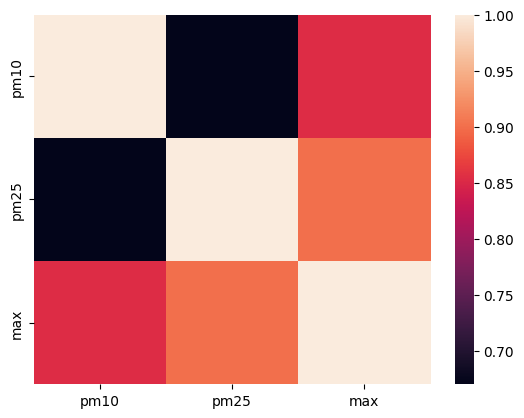

In [ ]:
sns.heatmap(data=df_cleaned.corr())

In [ ]:
df['location'].value_counts()

DKI4    226
DKI3     55
DKI2     52
DKI5     31
DKI1      1
Name: location, dtype: int64

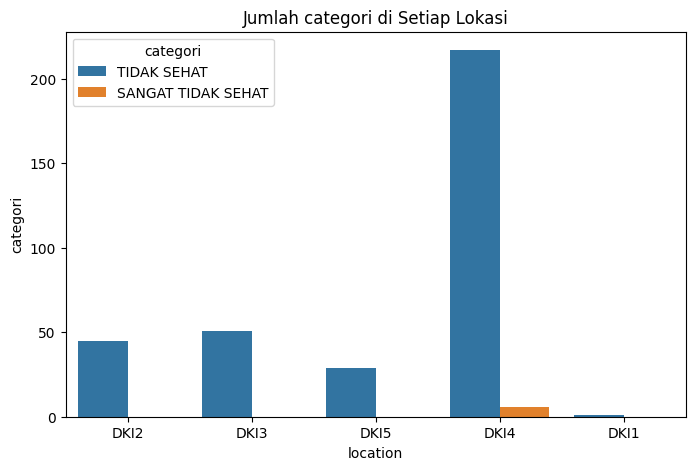

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data = df_cleaned, x = 'location', hue = 'categori')
plt.xlabel('location')
plt.ylabel('categori')
plt.title('Jumlah categori di Setiap Lokasi')
plt.legend(title='categori')
plt.show()

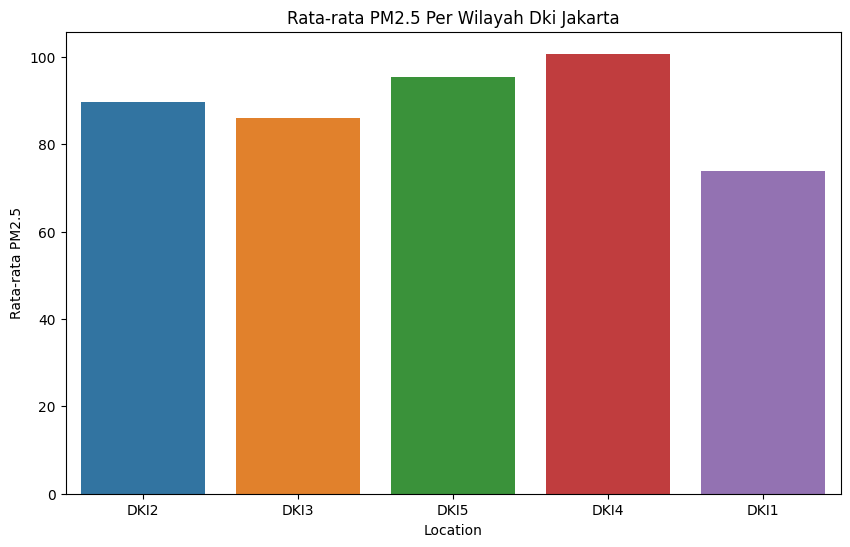

In [ ]:
#df.groupby('location')['pm25'].mean().plot(kind='bar')
plt.figure(figsize = (10,6))
sns.barplot(x='location', y='pm25', data=df_cleaned, errorbar = None)
plt.xlabel('Location')
plt.ylabel('Rata-rata PM2.5')
plt.title('Rata-rata PM2.5 Per Wilayah Dki Jakarta')
plt.show()

In [ ]:
from datetime import datetime

In [ ]:
df_cleaned['tanggal'] = pd.to_datetime(df_cleaned['tanggal'], format='%m/%d/%Y')
df_cleaned['bulan'] = df_cleaned['tanggal'].dt.strftime('%B')
df_tanggal = df_cleaned.sort_values(by='tanggal')

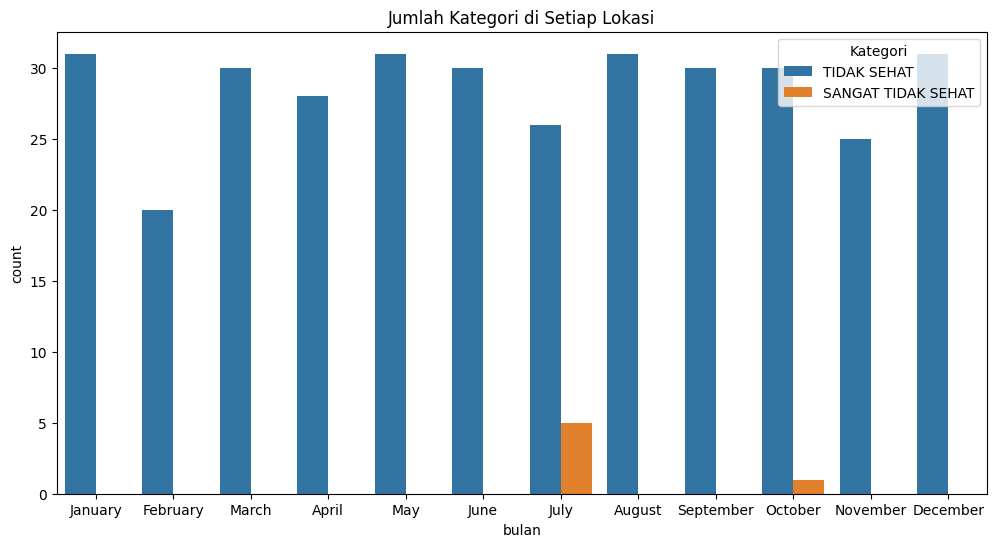

In [ ]:
plt.figure(figsize=(12, 6 ))
sns.countplot(data=df_cleaned, x='bulan', hue='categori')
plt.xlabel('bulan')
plt.ylabel('count')
plt.title('Jumlah Kategori di Setiap Lokasi')
plt.legend(title='Kategori')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

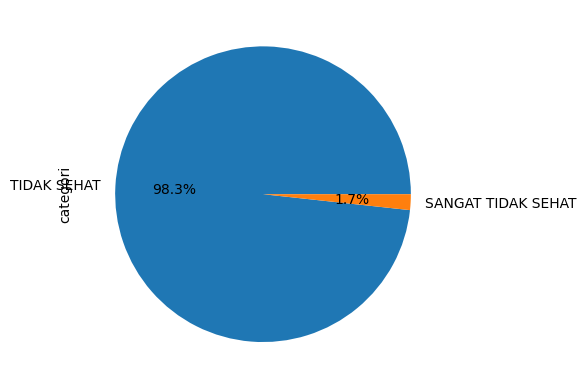

In [ ]:
df_cleaned['categori'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show

In [ ]:
df_cleaned

,tanggal,pm10,pm25,max,categori,location,bulan
0,2021-01-01,43,94,65,TIDAK SEHAT,DKI2,January
1,2021-01-02,58,94,86,TIDAK SEHAT,DKI3,January
2,2021-01-03,64,94,93,TIDAK SEHAT,DKI3,January
3,2021-01-04,50,94,77,TIDAK SEHAT,DKI2,January
4,2021-01-05,59,94,89,TIDAK SEHAT,DKI3,January
...,...,...,...,...,...,...,...
360,2021-12-27,75,121,121,TIDAK SEHAT,DKI4,December
361,2021-12-28,59,89,89,TIDAK SEHAT,DKI4,December
362,2021-12-29,61,98,98,TIDAK SEHAT,DKI4,December
363,2021-12-30,60,102,102,TIDAK SEHAT,DKI4,December


In [ ]:
df.dtypes

tanggal      object
pm10          int64
pm25        float64
so2           int64
co            int64
o3            int64
no2           int64
max           int64
critical     object
categori     object
location     object
dtype: object

Df Jan Import Ke Google Sheets Untuk Visualisasi

In [ ]:
df_copy = df.copy()
df_copy.fillna(df_copy.mean(), inplace=True)
df_jan = df_copy.copy()

#df_jan = df_copy.drop(df_copy.index[0:31])

<ipython-input-48-5c7f2740c7df>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_copy.fillna(df_copy.mean(), inplace=True)


In [ ]:
df_jan

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
0,1/1/2021,43,94.694611,58,29,35,65,65,O3,SEDANG,DKI2
1,1/2/2021,58,94.694611,86,38,64,80,86,PM25,SEDANG,DKI3
2,1/3/2021,64,94.694611,93,25,62,86,93,PM25,SEDANG,DKI3
3,1/4/2021,50,94.694611,67,24,31,77,77,O3,SEDANG,DKI2
4,1/5/2021,59,94.694611,89,24,35,77,89,PM25,SEDANG,DKI3
...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/2021,75,121.000000,61,23,40,47,121,PM25,TIDAK SEHAT,DKI4
361,12/28/2021,59,89.000000,53,16,34,33,89,PM25,SEDANG,DKI4
362,12/29/2021,61,98.000000,54,15,37,29,98,PM25,SEDANG,DKI4
363,12/30/2021,60,102.000000,53,17,38,44,102,PM25,TIDAK SEHAT,DKI4


In [ ]:
df_jan.dtypes

tanggal      object
pm10          int64
pm25        float64
so2           int64
co            int64
o3            int64
no2           int64
max           int64
critical     object
categori     object
location     object
dtype: object

In [ ]:
df_jan['tanggal'] = df['tanggal'].astype(object)
df_jan

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
0,1/1/2021,43,94.694611,58,29,35,65,65,O3,SEDANG,DKI2
1,1/2/2021,58,94.694611,86,38,64,80,86,PM25,SEDANG,DKI3
2,1/3/2021,64,94.694611,93,25,62,86,93,PM25,SEDANG,DKI3
3,1/4/2021,50,94.694611,67,24,31,77,77,O3,SEDANG,DKI2
4,1/5/2021,59,94.694611,89,24,35,77,89,PM25,SEDANG,DKI3
...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/2021,75,121.000000,61,23,40,47,121,PM25,TIDAK SEHAT,DKI4
361,12/28/2021,59,89.000000,53,16,34,33,89,PM25,SEDANG,DKI4
362,12/29/2021,61,98.000000,54,15,37,29,98,PM25,SEDANG,DKI4
363,12/30/2021,60,102.000000,53,17,38,44,102,PM25,TIDAK SEHAT,DKI4


In [ ]:
df_jan['pm25'] = df['pm25'].astype(int)

In [ ]:
df_jan.dtypes

tanggal     object
pm10         int64
pm25         int64
so2          int64
co           int64
o3           int64
no2          int64
max          int64
critical    object
categori    object
location    object
dtype: object

In [ ]:
df_jan

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
0,1/1/2021,43,94,58,29,35,65,65,O3,SEDANG,DKI2
1,1/2/2021,58,94,86,38,64,80,86,PM25,SEDANG,DKI3
2,1/3/2021,64,94,93,25,62,86,93,PM25,SEDANG,DKI3
3,1/4/2021,50,94,67,24,31,77,77,O3,SEDANG,DKI2
4,1/5/2021,59,94,89,24,35,77,89,PM25,SEDANG,DKI3
...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/2021,75,121,61,23,40,47,121,PM25,TIDAK SEHAT,DKI4
361,12/28/2021,59,89,53,16,34,33,89,PM25,SEDANG,DKI4
362,12/29/2021,61,98,54,15,37,29,98,PM25,SEDANG,DKI4
363,12/30/2021,60,102,53,17,38,44,102,PM25,TIDAK SEHAT,DKI4


In [ ]:
df_copy = df_cleaned.copy()

df_tanggal = df_copy.drop(columns='tanggal')

In [ ]:
df_tanggal

,pm10,pm25,max,categori,location,bulan
0,43,94,65,TIDAK SEHAT,DKI2,January
1,58,94,86,TIDAK SEHAT,DKI3,January
2,64,94,93,TIDAK SEHAT,DKI3,January
3,50,94,77,TIDAK SEHAT,DKI2,January
4,59,94,89,TIDAK SEHAT,DKI3,January
...,...,...,...,...,...,...
360,75,121,121,TIDAK SEHAT,DKI4,December
361,59,89,89,TIDAK SEHAT,DKI4,December
362,61,98,98,TIDAK SEHAT,DKI4,December
363,60,102,102,TIDAK SEHAT,DKI4,December


Df_Dropjan Untuk Modelling Regresi

In [ ]:
df_dropjan = df_tanggal.drop(df_tanggal.index[0:30])

In [ ]:
df_dropjan = df_tanggal.drop('max', axis=1)

In [ ]:
df_dropjan

,pm10,pm25,categori,location,bulan
0,43,94,TIDAK SEHAT,DKI2,January
1,58,94,TIDAK SEHAT,DKI3,January
2,64,94,TIDAK SEHAT,DKI3,January
3,50,94,TIDAK SEHAT,DKI2,January
4,59,94,TIDAK SEHAT,DKI3,January
...,...,...,...,...,...
360,75,121,TIDAK SEHAT,DKI4,December
361,59,89,TIDAK SEHAT,DKI4,December
362,61,98,TIDAK SEHAT,DKI4,December
363,60,102,TIDAK SEHAT,DKI4,December


In [ ]:
df_drop_bln = df_tanggal.drop('bulan', axis=1)

In [ ]:
df_drop_bln

,pm10,pm25,max,categori,location
0,43,94,65,TIDAK SEHAT,DKI2
1,58,94,86,TIDAK SEHAT,DKI3
2,64,94,93,TIDAK SEHAT,DKI3
3,50,94,77,TIDAK SEHAT,DKI2
4,59,94,89,TIDAK SEHAT,DKI3
...,...,...,...,...,...
360,75,121,121,TIDAK SEHAT,DKI4
361,59,89,89,TIDAK SEHAT,DKI4
362,61,98,98,TIDAK SEHAT,DKI4
363,60,102,102,TIDAK SEHAT,DKI4


# **Modelling Klasifikasi**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_tanggal['location'] = le.fit_transform(df_tanggal['location'])
df_tanggal['categori'] = le.fit_transform(df_tanggal['categori'])
df_tanggal['bulan'] = le.fit_transform(df_tanggal['bulan'])

x = df_tanggal.drop('categori',axis=1)
y = df_tanggal['categori']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

# XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(x_train, y_train)
xgb_pred = xgb_model.predict(x_test)

Evaluasi

In [ ]:
print("Classification Report (KNN):\n", classification_report(y_test, knn_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))

Classification Report (KNN):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00       103

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

Confusion Matrix:
 [[  2   0]
 [  0 103]]


In [ ]:
print("Classification Report (Decision Tree):\n", classification_report(y_test, dt_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00       103

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

Confusion Matrix:
 [[  2   0]
 [  0 103]]


In [ ]:
print("Classification Report (Random Forest):\n", classification_report(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00       103

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

Confusion Matrix:
 [[  2   0]
 [  0 103]]


Variabel yang berpengaruh

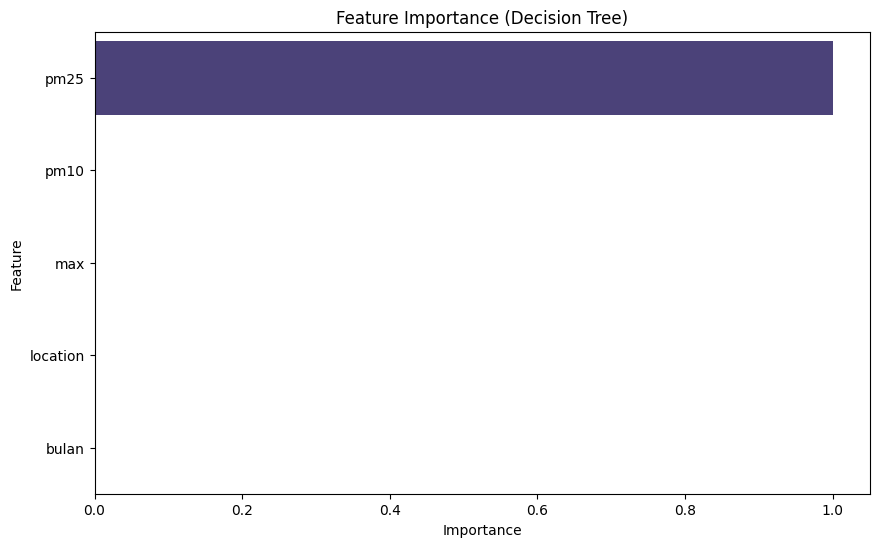

In [ ]:
# Decision Tree
feature_importance_dt = pd.DataFrame({'Feature': x.columns, 'Importance': dt.feature_importances_})

feature_importance_dt = feature_importance_dt.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_dt, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Decision Tree)')
plt.show()

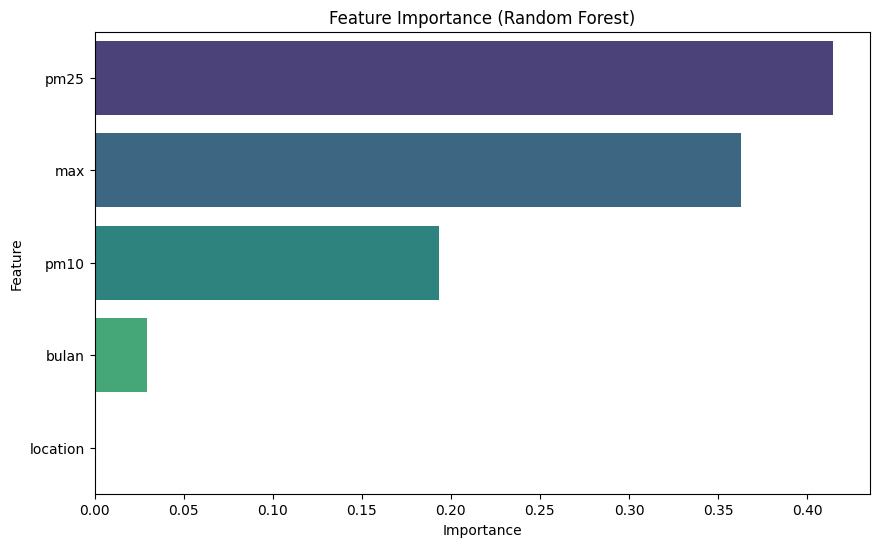

In [ ]:
# Random Forest
feature_importance_rf = pd.DataFrame({'Feature': x.columns, 'Importance': rf.feature_importances_})

feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Random Forest)')
plt.show()

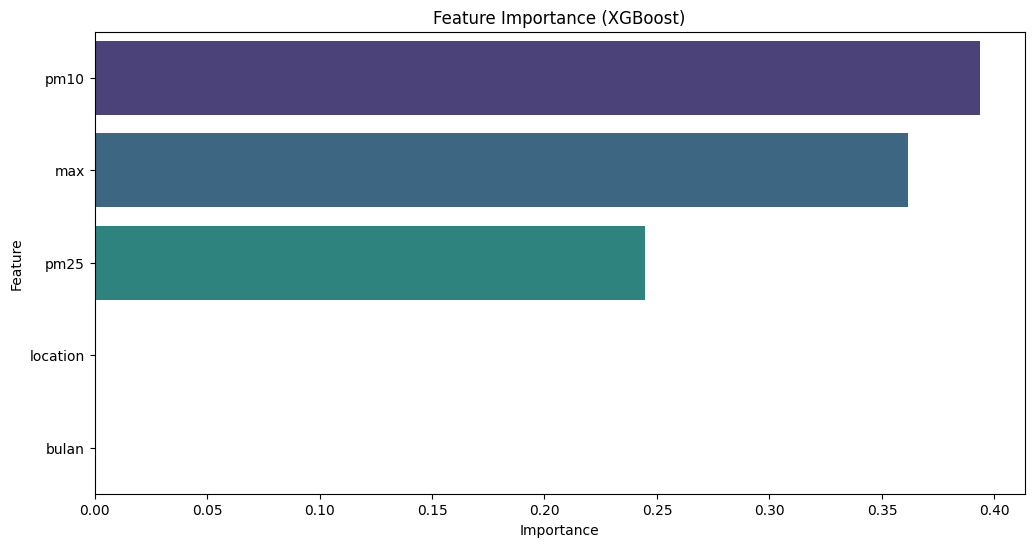

In [ ]:
# XGBoost
feature_importance_xgb = pd.DataFrame({'Feature': x.columns, 'Importance': xgb_model.feature_importances_})

feature_importance_xgb = feature_importance_xgb.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_xgb, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (XGBoost)')
plt.show()

# **Modelling Regresion**


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
le = LabelEncoder()
df_dropjan['location'] = le.fit_transform(df_dropjan['location'])
df_dropjan['categori'] = le.fit_transform(df_dropjan['categori'])
df_dropjan['bulan'] = le.fit_transform(df_dropjan['bulan'])

x1 = df_dropjan.drop('pm25',axis=1)
y1 = df_dropjan['pm25']
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=42)

In [ ]:
df_dropjan

,pm10,pm25,categori,location,bulan
0,43,94,1,1,4
1,58,94,1,2,4
2,64,94,1,2,4
3,50,94,1,1,4
4,59,94,1,2,4
...,...,...,...,...,...
360,75,121,1,3,2
361,59,89,1,3,2
362,61,98,1,3,2
363,60,102,1,3,2


In [ ]:
df_dropjan

,pm10,pm25,categori,location,bulan
0,43,94,1,1,4
1,58,94,1,2,4
2,64,94,1,2,4
3,50,94,1,1,4
4,59,94,1,2,4
...,...,...,...,...,...
360,75,121,1,3,2
361,59,89,1,3,2
362,61,98,1,3,2
363,60,102,1,3,2


In [ ]:
regressor = LinearRegression()
regressor.fit(x1_train, y1_train)

LinearRegression()

In [ ]:
#nilai konstan dan koefisien untuk setiap variabel independen
print('Model intercept: ', regressor.intercept_)
print('Model coefficients: ', regressor.coef_)

Model intercept:  77.9687902494529
Model coefficients:  [  0.81227889 -37.7905041    2.2085992    0.04313844]


In [ ]:
#Hasil Nilai Prediksi
prediction = regressor.predict(x1_test)
prediction

array([109.60838856,  76.1324005 ,  94.30450506, 100.88901302,
       103.69419891,  93.53536461,  82.93260066,  98.02079197,
       104.90726901, 116.06348121,  93.40594929,  91.01225108,
       110.19242999,  78.24402637, 161.16449528,  89.40023856,
        99.17817837,  95.61454849, 104.77785369,  89.61593076,
       100.88901302,  99.95986408, 105.96033061,  98.05323395,
        78.48296028,  91.06793478,  96.01533971,  62.05413236,
       103.43536827, 111.18980789,  91.05538952, 114.43892344,
       117.06085911, 103.19643436,  88.07764987,  95.48698198,
        86.506927  ,  75.86287341,  95.58395531,  95.92906283,
       106.4455499 ,  94.14449656,  93.1902571 , 101.85579774,
        93.57850305,  91.73825308, 101.30050069,  97.59675904,
        79.8254457 ,  95.04305232,  90.62585392,  83.17338338,
       100.05868621,  98.5509985 ,  98.09637239, 102.47043235,
        98.3353063 ,  96.3962342 ,  86.32367678,  93.44908773,
       115.25120232,  78.38413814,  87.13595567,  99.68

Visualisasi Regression

<Axes: xlabel='pm25'>

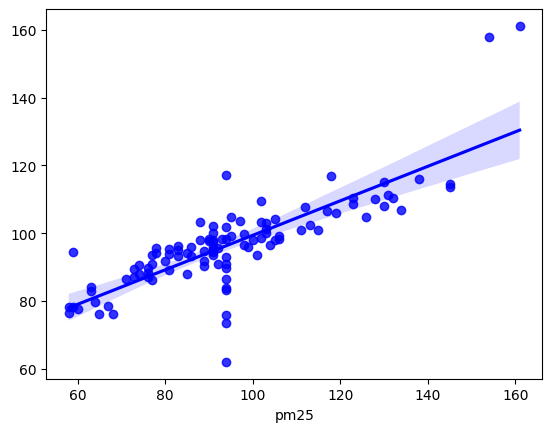

In [ ]:
sns.regplot(x=y1_test, y=prediction, color='blue')

Evaluasi

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
#Mengevaluasi model dengan MAE
mae = mean_absolute_error(y1_test, prediction)
print("Mean Absolute Error (MAE): ", mae)

#Mse
mse = mean_squared_error(y1_test,prediction)
print("Mean Squared Error (MSE): ", mse)

#Rsme
rmse = np.sqrt(mean_squared_error(y1_test, prediction))
print("RMSE:", rmse)

#R2 Square
r2 = r2_score(y1_test, prediction)
print("R-squared (R2): ", r2)

#Mape
mape = mean_absolute_percentage_error(y1_test, prediction)
print('Mean Absolute Percentage Error(MAPE):' ,mape)



Mean Absolute Error (MAE):  11.022007174610163
Mean Squared Error (MSE):  179.25861890174423
RMSE: 13.388749713910714
R-squared (R2):  0.6063844667446339
Mean Absolute Percentage Error(MAPE): 0.12531500680442847


In [ ]:
#Penjelasan = R2 Sekitar 88% dari variasi dalam variabel target (output) dapat dijelaskan oleh model regresi. Dengan kata lain, model Anda berhasil dalam memahami pola dan tren dalam data sekitar 88%.
accuracy = regressor.score(x1_train, y1_train)
print("Model Accuracy: ", accuracy)

Model Accuracy:  0.43800799528787704


  Google Sheets

In [ ]:
## Importing Library
!pip install --upgrade gspread

import pandas as pd
import gspread

from google.colab import auth

from google.auth import default

## 1. Define the sheet ID and worksheet name
sheet_id ="1WosRiRpQNDQXTnEqOoSi-YmPUVmGUvcRCz6hP-OupOQ" #adjust to your own
worksheet_name = "Sheet1" #adjust to your own

## 2. Allow Google Colaboratory to access Google Sheets
auth.authenticate_user() #Authenticating user
creds, _ = default() #Storing your google sheet credentials

gc = gspread.authorize(creds) #Authorizing your credentials

sh = gc.open_by_key(sheet_id) #Establishing connection to your sheet

worksheet = sh.worksheet(worksheet_name) #Specifying the worksheet used

## 3. Write data on Google Sheets
worksheet.clear() #Clearing worksheet (optional)
worksheet.update([df_jan.columns.values.tolist()] + df_jan.values.tolist())

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 988.6 kB/s eta 0:00:00
  Attempting uninstall: gspread
    Found existing installation: gspread 3.4.2
    Uninstalling gspread-3.4.2:
      Successfully uninstalled gspread-3.4.2


<ipython-input-82-7276930f74ad>:27: DeprecationWarning: [Deprecated][in version 6.0.0]: Method signature's arguments 'range_name' and 'values' will change their order. We recommend using named arguments for minimal impact. In addition, the argument 'values' will be mandatory of type: 'List[List]'. (ex) Worksheet.update(values = [[]], range_name=) 
  worksheet.update([df_jan.columns.values.tolist()] + df_jan.values.tolist())


{'spreadsheetId': '1WosRiRpQNDQXTnEqOoSi-YmPUVmGUvcRCz6hP-OupOQ',
 'updatedRange': 'Sheet1!A1:K366',
 'updatedRows': 366,
 'updatedColumns': 11,
 'updatedCells': 4026}

# **FBPROPHET**

In [ ]:
!python -m pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
df_fbpro = df_cleaned.drop(df_tanggal.index[0:31])

In [ ]:
df_fbpro

,tanggal,pm10,pm25,max,categori,location,bulan
31,2021-02-01,73,126,126,TIDAK SEHAT,DKI5,February
32,2021-02-02,53,70,70,TIDAK SEHAT,DKI3,February
34,2021-02-04,36,59,59,TIDAK SEHAT,DKI5,February
39,2021-02-09,33,57,57,TIDAK SEHAT,DKI4,February
40,2021-02-10,50,64,64,TIDAK SEHAT,DKI3,February
...,...,...,...,...,...,...,...
360,2021-12-27,75,121,121,TIDAK SEHAT,DKI4,December
361,2021-12-28,59,89,89,TIDAK SEHAT,DKI4,December
362,2021-12-29,61,98,98,TIDAK SEHAT,DKI4,December
363,2021-12-30,60,102,102,TIDAK SEHAT,DKI4,December


In [ ]:
df_prophet = df_fbpro.rename(columns={'tanggal': 'ds', 'pm25': 'y'})
df_prophet.head()

,ds,pm10,y,max,categori,location,bulan
31,2021-02-01,73,126,126,TIDAK SEHAT,DKI5,February
32,2021-02-02,53,70,70,TIDAK SEHAT,DKI3,February
34,2021-02-04,36,59,59,TIDAK SEHAT,DKI5,February
39,2021-02-09,33,57,57,TIDAK SEHAT,DKI4,February
40,2021-02-10,50,64,64,TIDAK SEHAT,DKI3,February


In [ ]:
future1 = pd.DataFrame({
    'ds': pd.date_range(start='2022-02-01', end='2022-02-28', freq='D')
})

In [ ]:
m = Prophet()
m.fit(df_prophet)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppj_j53ya/zyhlcz56.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppj_j53ya/qhm9c8lv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=143', 'data', 'file=/tmp/tmppj_j53ya/zyhlcz56.json', 'init=/tmp/tmppj_j53ya/qhm9c8lv.json', 'output', 'file=/tmp/tmppj_j53ya/prophet_modela8ob8yz0/prophet_model-20240103083620.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:36:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:36:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast1 = m.predict(future1)
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2022-02-01,69.100846,45.174830,93.765823
1,2022-02-02,75.465722,50.953755,99.913294
2,2022-02-03,74.578876,49.081891,99.242738
3,2022-02-04,74.250803,50.199318,98.975256
4,2022-02-05,72.688553,48.153575,96.053902
5,2022-02-06,76.712369,51.048125,102.507617
6,2022-02-07,72.844691,48.171356,95.299279
7,2022-02-08,67.718098,42.628486,92.779233
8,2022-02-09,74.082973,51.448306,98.074147
9,2022-02-10,73.196127,50.004904,96.632139


In [ ]:
nilai_tertinggi = forecast1['yhat'].max()
nilai_tertinggi
baris_tertinggi = forecast1[forecast1['yhat'] == nilai_tertinggi]
print("Nilai Tertinggi di Kolom 'yhat':", nilai_tertinggi)
print("Baris dengan Nilai Tertinggi:")
print(baris_tertinggi[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

Nilai Tertinggi di Kolom 'yhat': 76.7123686753419
Baris dengan Nilai Tertinggi:
          ds       yhat  yhat_lower  yhat_upper
5 2022-02-06  76.712369   51.048125  102.507617


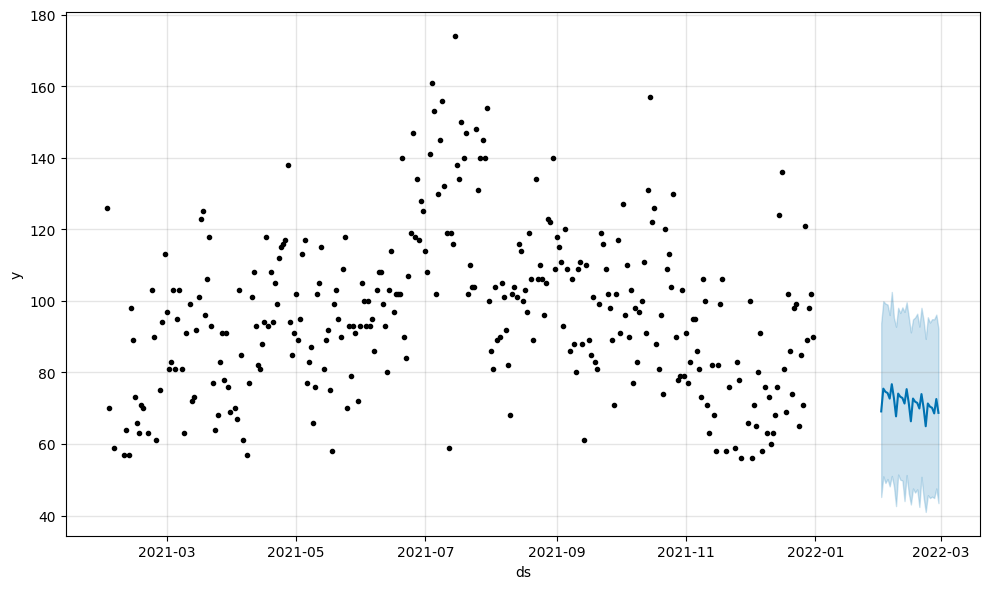

In [ ]:
fig1 = m.plot(forecast1)

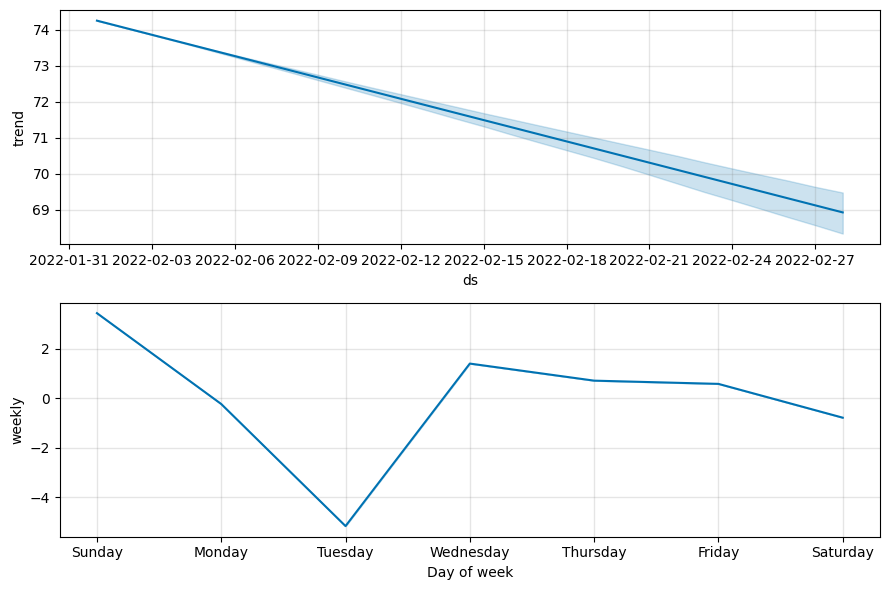

In [ ]:
fig2 = m.plot_components(forecast1)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast1)